# 📊 Netflix Ratings Analysis Project

Welcome to Netflix Ratings data analysis project!

**Goals:**
- Understand Netflix content types, ratings, and trends.
- Clean and visualize data using Python libraries.

**Steps:**
1. Load the dataset.
2. Clean the data.
3. Analyze and visualize.
4. Draw insights.

In [20]:
# Importing the necessary libraries for data analysis, cleaning, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px


In [ ]:
# 📥 Step 1: Upload and load the Netflix dataset (netflix_titles.csv')
from google.colab import files
uploaded = files.upload()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [ ]:
# Load the uploaded CSV file
df = pd.read_csv('netflix_titles.csv')
# Displaying the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
df.head()

In [17]:
# 📊 Step 2: Basic info and cleanup

df.info()

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


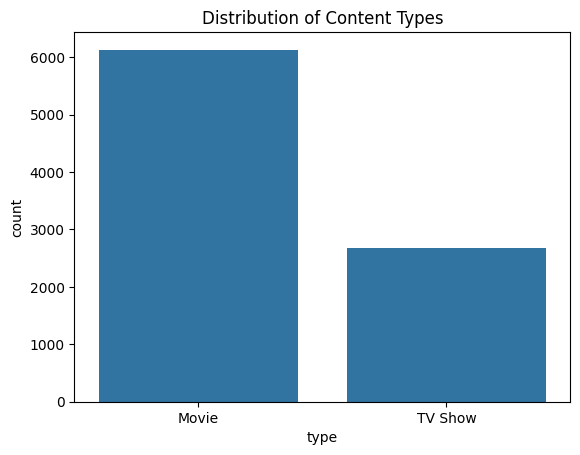

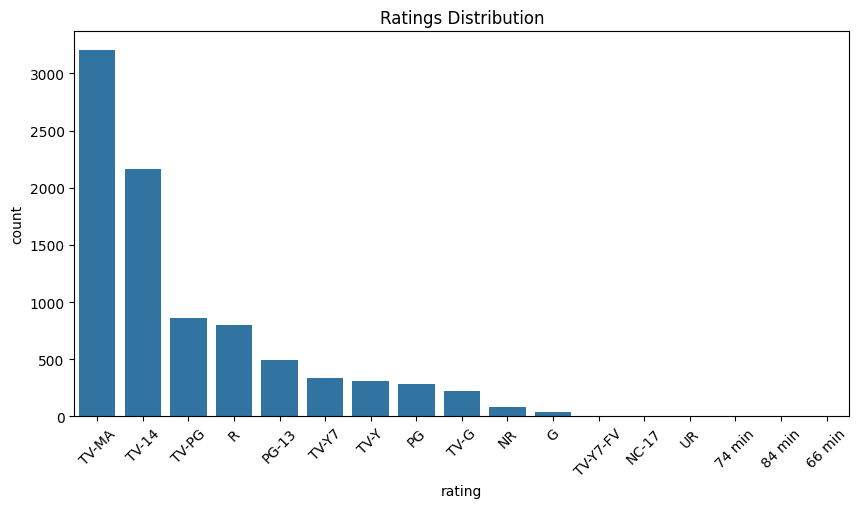

In [6]:
# 📈 Step 3: Visualize content type and ratings
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Ratings Distribution')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Summary Statistics
df.describe()

,date_added,release_year,year_added
count,8709,8807.000000,8709.000000
mean,2019-05-23 01:45:29.452290816,2014.180198,2018.887932
min,2008-01-01 00:00:00,1925.000000,2008.000000
25%,2018-04-20 00:00:00,2013.000000,2018.000000
50%,2019-07-12 00:00:00,2017.000000,2019.000000
75%,2020-08-26 00:00:00,2019.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000
std,NaN,8.819312,1.567961


In [9]:
# Unique Values
df['rating'].value_counts()  # Example for checking ratings

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


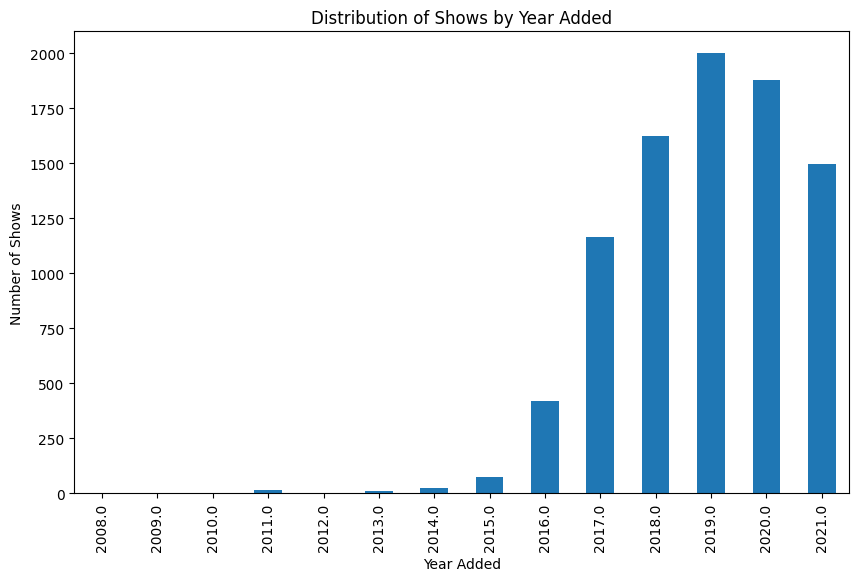

In [10]:
# Visualizations
# Distribution of Shows by Year Added
import matplotlib.pyplot as plt

# Plot the distribution of shows by year_added
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Shows by Year Added')
plt.xlabel('Year Added')
plt.ylabel('Number of Shows')
plt.xticks(rotation=90)
plt.show()


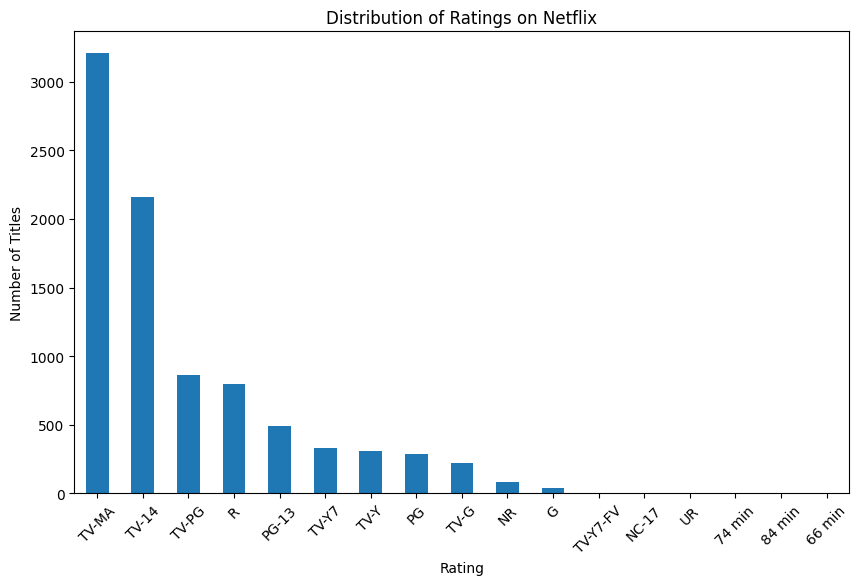

In [11]:
# Distribution of Ratings
df['rating'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


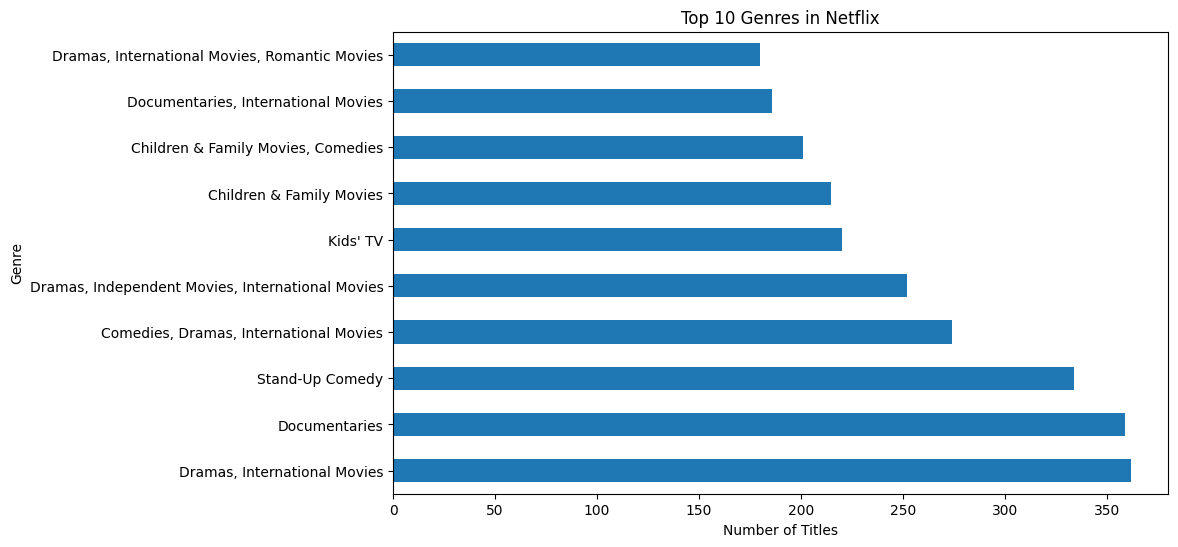

In [12]:
# Genre Distribution (Bar Chart)
df['listed_in'].value_counts().head(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Genres in Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


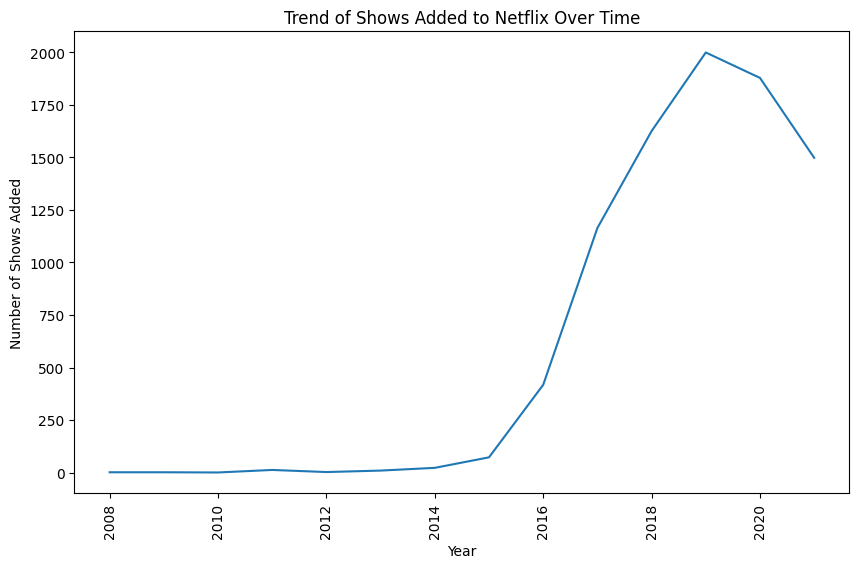

In [13]:
# Trend of Shows Over Time (Line Chart)
df['year_added'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Trend of Shows Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.xticks(rotation=90)
plt.show()


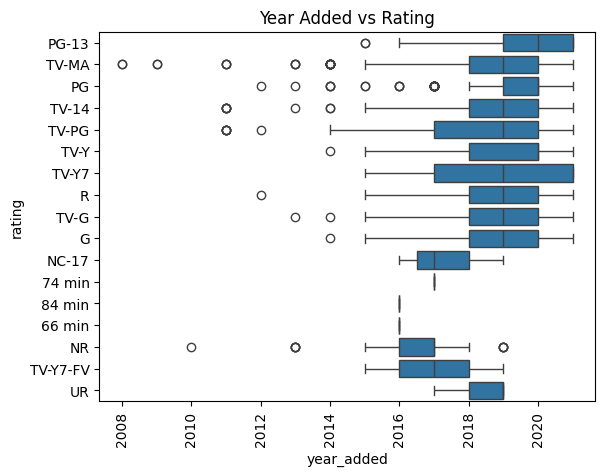

In [14]:
# Correlation Between Year and Rating
import seaborn as sns

# If 'year_added' and 'rating' are numeric or can be converted to numeric, plot the correlation
sns.boxplot(x='year_added', y='rating', data=df)
plt.title('Year Added vs Rating')
plt.xticks(rotation=90)
plt.show()


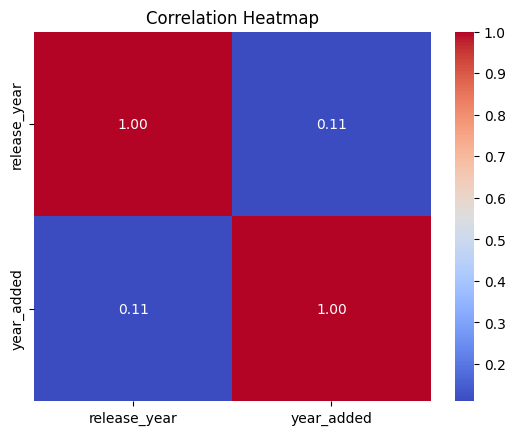

In [16]:
# heatmap
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
correlation = df[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()